# Netflix Data Exploration and Visualisation Project 


##  1. Probelm Statment and Basic Metrics 

Netflix stands as one of the leading platforms for media and video streaming, boasting a vast library of over 10,000 movies and TV shows. As of mid-2021, its global subscriber base surpassed 222 million. This tabular dataset encompasses comprehensive listings of all movies and TV shows offered on Netflix, including crucial details such as cast, directors, ratings, release year, duration, and more.

The objective of this business case is to analyze the dataset of movies and TV shows on Netflix to derive insights beneficial for decision-making regarding content production and business expansion strategies across various countries.

Basic Metrics Includes:
1. The dataset will be analyzed to determine the proportion of movies and TV shows.
2. Trends over time will be examined to detect any shifts in focus towards specific content types.
3. Popular genres among Netflix subscribers will be identified.
4. Genre preferences across different countries will be explored.
5. The most frequently featured directors and actors will be identified
6. Analysis will be conducted to assess whether specific directors or actors contribute to higher viewership or ratings
7. The distribution of content across different countries will be determined
8. Potential growth opportunities in untapped markets will be identified
9. The distribution of ratings (e.g., TV-G, TV-MA) and their impact on viewership will be analyzed.
10. The distribution of content duration (in minutes for movies or number of seasons for TV shows) will be examined.
11. The frequency of content additions over time will be analyzed

####  DATA DESCRIPTION: The data consists of the following attributes:
1. Show_id: Unique ID for every Movie / Tv Show
2. Type: Identifier - A Movie or TV Show
3. Title: Title of the Movie / Tv Show
4. Director: Director of the Movie
5. Cast: Actors involved in the movie/show
6. Country: Country where the movie/show was produced
7. Date_added: Date it was added on Netflix
8. Release_year: Actual Release year of the movie/show
9. Rating: TV Rating of the movie/show
10. Duration: Total Duration - in minutes or number of seasons
11. Listed_in: Genre
12. Description: The summary description

## 2. Basic EDA(Observations on Data)

In [2]:
#Import Libraries

In [96]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings

In [97]:
# Load Netflix data present in CSV file
data = pd.read_csv("netflix.csv")

## Shape of the Data

In [98]:
# Shape of data to check the number of rows and columns
print(data.shape)

(8807, 12)


In [99]:
# To get the column names
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data types of all the attributes

In [100]:
#check the datatype of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [101]:
#To get the first 10 rows of data 
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


##  Statistical summary

In [102]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Missing value detection

In [103]:
#To check total number of null values 
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### Among the 8807 records, the 'director' column accounts for 2634 null values, representing 30% of the total dataset. In comparison, both the 'cast' and 'country' columns contain 825 and 831 null values, respectively. Notably, the 'director' column exhibits a higher proportion of missing values compared to the others. Instead of eliminating these missing entries, it's essential to analyze the distribution of director data and explore methods for data imputation.

##### One approach to address missing values involves replacing them with the mean, median, or mode of the corresponding variable. While this strategy maintains the overall distribution, it may not be suitable for variables with skewed distributions or outliers. Hence, we have decided to replace missing values in the 'director,' 'cast,' and 'country' columns with placeholder values.

##### In cases where missing values are minimal and randomly scattered, removing rows or columns with missing data may be appropriate. Therefore, we have chosen to drop entries with null values in the 'date_added' and 'rating' columns.



In [104]:
#Rather than filling missing values in the director,cast,country attributes with the most frequently occurring one,we opted to replace them with the placeholder values as below
data.director.fillna("Unknown", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data.country.fillna("Country Unavailable", inplace=True)
data.dropna(subset=["date_added", "rating","duration"], inplace=True)
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Checking missing values after imputation

In [105]:
print(data.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


## Statistical summary after missing values imputation

In [106]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 3. Non-Graphical Analysis - Data Preprocessing 
##### Non-Graphical Analysis  involves examining the characteristics and distributions of variables, identifying patterns, and extracting insights from the data 

In [107]:
# Non-graphical analysis using value counts and unique attributes
non_graphical_analysis = {}

# Value counts for columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
for col in columns_with_missing_values:
    non_graphical_analysis[col] = data[col].value_counts(dropna=False)

# Unique attributes for all columns
for col in data.columns:
    non_graphical_analysis[f'{col}_unique'] = data[col].unique()

# Print non-graphical analysis results
for key, value in non_graphical_analysis.items():
    print(f"{key}:\n{value}\n")

show_id_unique:
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']

type_unique:
['Movie' 'TV Show']

title_unique:
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

director_unique:
['Kirsten Johnson' 'Unknown' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

cast_unique:
['No Cast'
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Bres

##### The direcor,cast,country,listed_in columns contains nested values where multiple values are listed within a single entry separated by commas. Nested values may contain redundant or inconsistent information, which can lead to inaccuracies in analysis results and hinder decision-making processes.Visualizing untreated nested values also be challenging. Standard visualization techniques may not effectively represent the hierarchical relationships within the data, limiting the ability to gain insights from visualizations.
#####  One common approach to handle such nested values is to split and stack them into separate rows,

In [108]:
data_copy = data.copy()
# Converting the 'date_added' column to datetime format
data_copy["date_added"] = pd.to_datetime(data_copy['date_added'], format='%B %d, %Y',errors='coerce')
# Extracting month, month name, and year from the 'date_added' column
data_copy['month_added'] = data_copy['date_added'].dt.month
data_copy['month_name_added'] = data_copy['date_added'].dt.month_name()
data_copy['year_added'] = data_copy['date_added'].dt.year
#create new directors data frame, that  associates each director with the titles of the movies they directed. 
directors_df = pd.DataFrame()
#The explode() function is then used to transform these lists into separate rows
directors_df['Director'] = data['director'].str.split(',').explode()
#Ignoring unknown directors as part of the data preprocessing
directors_df = directors_df[directors_df .Director != 'Unknown']
titles_directors = data['title'].repeat(data['director'].str.count(',') + 1).reset_index(drop=True)
titles_directors.index = range(len(titles_directors))  # Resetting index to avoid duplicate labels
directors_df['title'] = titles_directors
directors_df.head()

,Director,title
0,Kirsten Johnson,Dick Johnson Is Dead
2,Julien Leclercq,Ganglands
5,Mike Flanagan,Midnight Mass
6,Robert Cullen,My Little Pony: A New Generation
6,José Luis Ucha,My Little Pony: A New Generation


In [109]:
#create new cast data frame, that  associates each cast with the titles of the movies they acted.
cast_df = pd.DataFrame()
#The explode() function is then used to transform these lists into separate rows
cast_df['Actor'] = data['cast'].str.split(',').explode()
#Ignoring unknown cast as part of the data preprocessing
cast_df = cast_df[cast_df.Actor != 'No Cast']
titles_cast = data['title'].repeat(data['cast'].str.count(',') + 1).reset_index(drop=True)
titles_cast.index = range(len(titles_cast))  # Resetting index to avoid duplicate labels
cast_df['title'] = titles_cast
cast_df.shape

(64016, 2)

In [110]:
#Explore the country to identify the trends
country_df = pd.DataFrame()
#The explode() function is then used to transform these lists into separate rows
country_df['Country'] = data['country'].str.split(',').explode()
#Ignoring "No country Specified"  as part of the data preprocessing
country_df = country_df[country_df.Country != 'Country Unavailable']
titles_country = data['title'].repeat(data['country'].str.count(',') + 1).reset_index(drop=True)
titles_country.index = range(len(titles_country))  # Resetting index to avoid duplicate labels
country_df['title'] = titles_country
country_df.shape

(10004, 2)

In [111]:
data['listed_in'] = data['listed_in'].fillna("No Genre specified")
listed_in_df = pd.DataFrame()
#The explode() function is then used to transform these lists into separate rows
listed_in_df['listed_in'] = data['listed_in'].str.split(',').explode()
#Ignoring unknown directors as part of the data preprocessing
cast_df = cast_df[cast_df.Actor != 'No Genre specified']
titles_listed = data['title'].repeat(data['listed_in'].str.count(',') + 1).reset_index(drop=True)
titles_listed.index = range(len(titles_listed))  # Resetting index to avoid duplicate labels
listed_in_df['title'] = titles_listed
listed_in_df.shape

(19294, 2)

In [112]:
# Merge all these dataframes into one dataframe 'data' by Title
data_df = pd.merge(directors_df, cast_df, on='title')
data_df = pd.merge(data_df, country_df, on='title')
data_df = pd.merge(data_df, listed_in_df, on='title')

data = data.drop(['director', 'cast', 'country', 'listed_in','description'], axis=1)
data = pd.merge(data_df,data, on = 'title')

data.head(50)

,Director,title,Actor,Country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Andy Devonshire,Sankofa,Winslow Fegley,United States,Documentaries,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
1,Andy Devonshire,Sankofa,Winslow Fegley,United States,International Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
2,Andy Devonshire,Sankofa,Winslow Fegley,United States,Crime TV Shows,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
3,Andy Devonshire,Sankofa,Winslow Fegley,United States,Spanish-Language TV Shows,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
4,Andy Devonshire,Sankofa,Winslow Fegley,United States,TV Dramas,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
5,Andy Devonshire,Sankofa,Winslow Fegley,United States,Thrillers,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
6,Andy Devonshire,Sankofa,Winslow Fegley,Ghana,Documentaries,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
7,Andy Devonshire,Sankofa,Winslow Fegley,Ghana,International Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
8,Andy Devonshire,Sankofa,Winslow Fegley,Ghana,Crime TV Shows,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
9,Andy Devonshire,Sankofa,Winslow Fegley,Ghana,Spanish-Language TV Shows,s8,Movie,"September 24, 2021",1993,TV-MA,125 min


In [53]:
data.shape

(289309, 11)

## 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data 
##### Univariate analysis involves examining the distribution and characteristics of a single variable in isolation.Following data pre-processing, univariate analysis facilitates a visual understanding of the distinct properties and behaviors of individual variables.

### 4.1 Analysis of Movies Released per Year Over the Last 20-30 Years
##### In this analysis, we consider two content types: "Movie" and "TV Show." We aim to visualize the number of movies released per year over the past 20 to 30 years.

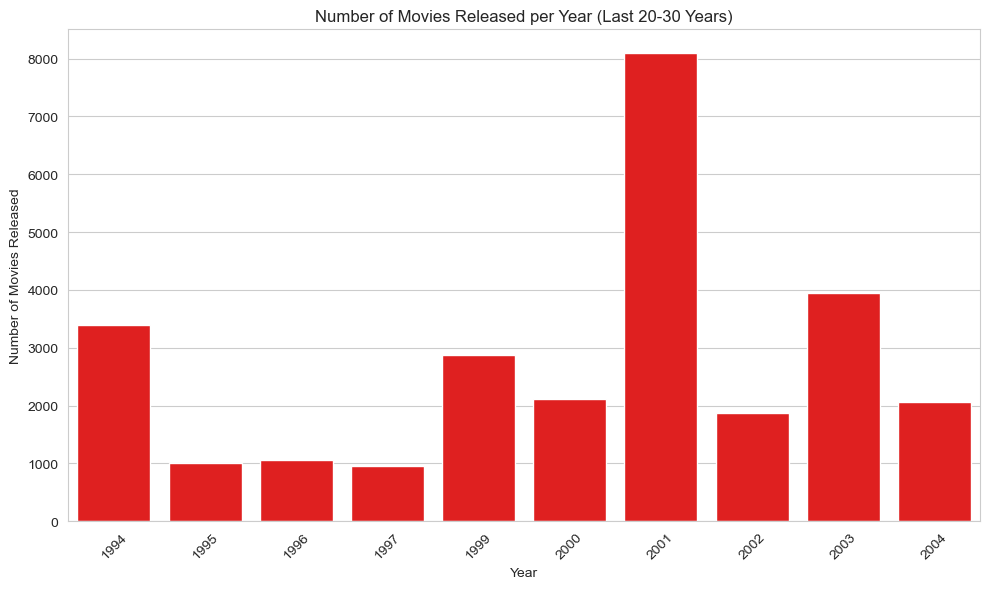

In [113]:
# Convert 'type' attribute to category type
data['type'] = data['type'].astype('category')
#Filter the dataset to include only the last 20-30 
current_year = pd.Timestamp.now().year
relevant_years = range(current_year - 30, current_year - 20 + 1)
movies_last_20_30_years = data[(data['type'] == 'Movie') & (data['release_year'].isin(relevant_years))]
# Group the filtered data by the release year and count the number of movies in each group
movies_per_year = movies_last_20_30_years.groupby('release_year').size().reset_index(name='count')
# Plot the distribution of the number of movies released per year
plt.figure(figsize=(10, 6))
sns.barplot(data=movies_per_year, x='release_year', y='count',color = 'red')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year (Last 20-30 Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights: 
#### Year 2001 witnessed a notable surge in movie releases, indicating a potential trend or anomaly in film production during that period.

### 4.1.1 Distribution of ratings for movies and TV shows : Count Plot.

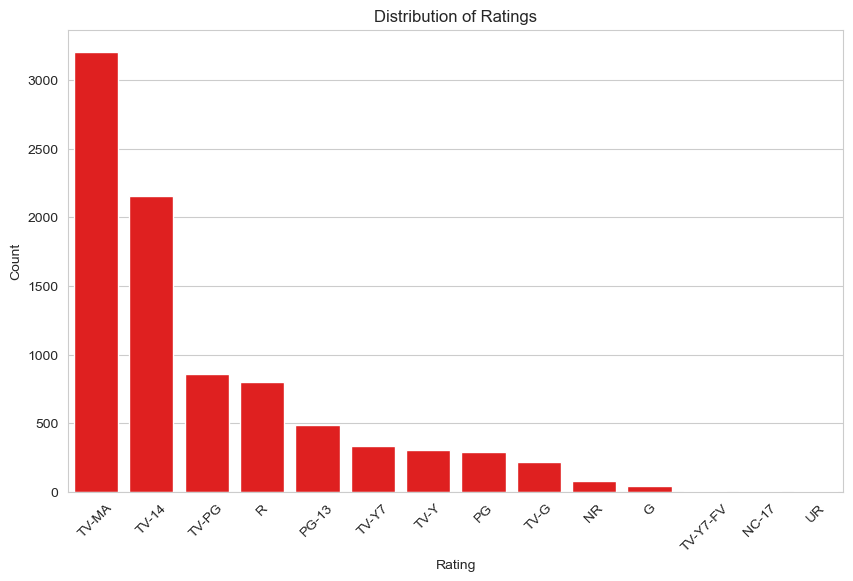

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_copy, x='rating', order=data_copy['rating'].value_counts().index,color='red')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights: 
##### The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are G.  Most of the content watched by the audience is for a mature audience. The TV-MA rating is a type of rating given by the TV parental guidelines to a television program.

##### The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age

### 4.1.2 Distribution of release years for movies and TV shows :Histogram for for univariate analysis

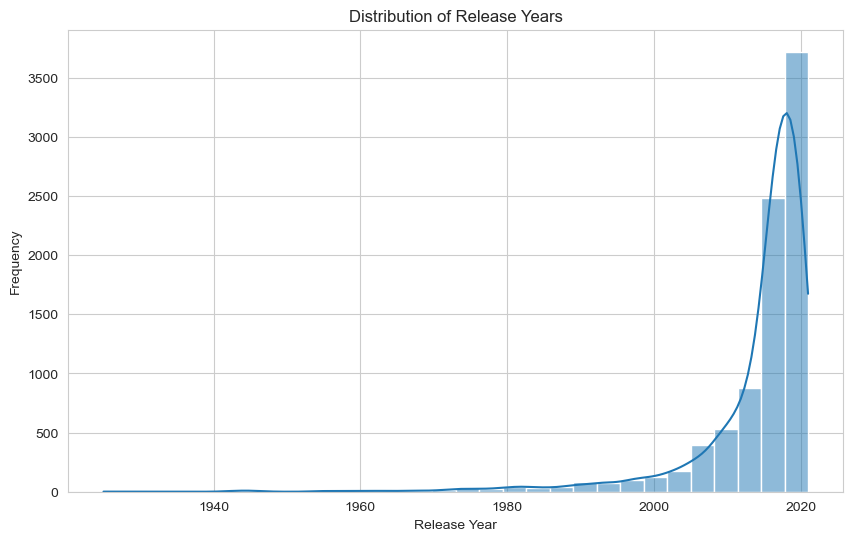

In [115]:
plt.figure(figsize=(10, 6))
#Sets the number of bins (or bars) to be used in the histogram 
#kernel density estimation (KDE) overlay on top of the histogram, providing a smooth estimation of the data's underlying distribution.
sns.histplot(data=data_copy, x='release_year', bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

### Insights: 
##### The majority of the movies and TV shows were released in the year 2021

### 4.2 Analyzing the comparison between TV shows and movies.

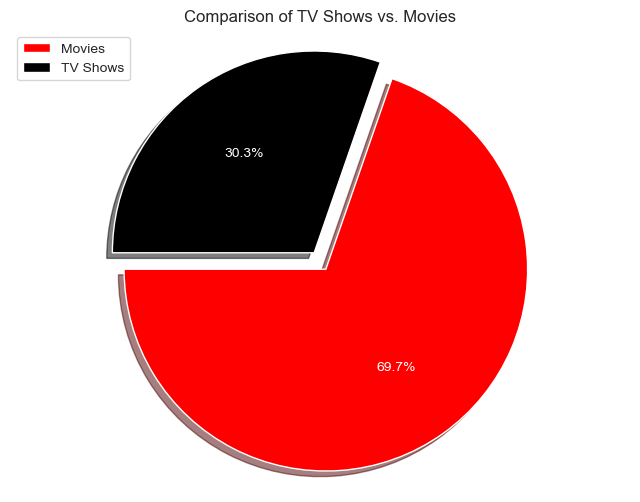

In [116]:
# Analyze the distribution of content type (Movie/TV Show)
# Analyze the distribution of content type (Movie/TV Show)
content_type_distribution = data['type'].value_counts()

# Define labels for the pie chart
labels = ['Movies', 'TV Shows']

# Define colors for the pie chart
colors = ['red', 'black']

# Define explode to emphasize a category
explode = (0.1, 0)

# Plotting the comparison of TV shows vs. movies using a pie chart with percentages
plt.figure(figsize=(8, 6))
plt.pie(content_type_distribution, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, textprops={'color': 'white'},startangle=180)
plt.title('Comparison of TV Shows vs. Movies')
plt.legend(loc='upper left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Insights: 
#### Movie titles constitute a significantly larger proportion (69.7%) compared to TV show titles (30.3%) in the dataset

### 4.2.1 Duration Distribution for Movies and TV Shows : BoxPlot
##### By examining the distribution of movie lengths and TV show durations, we can better understand the content available on Netflix.

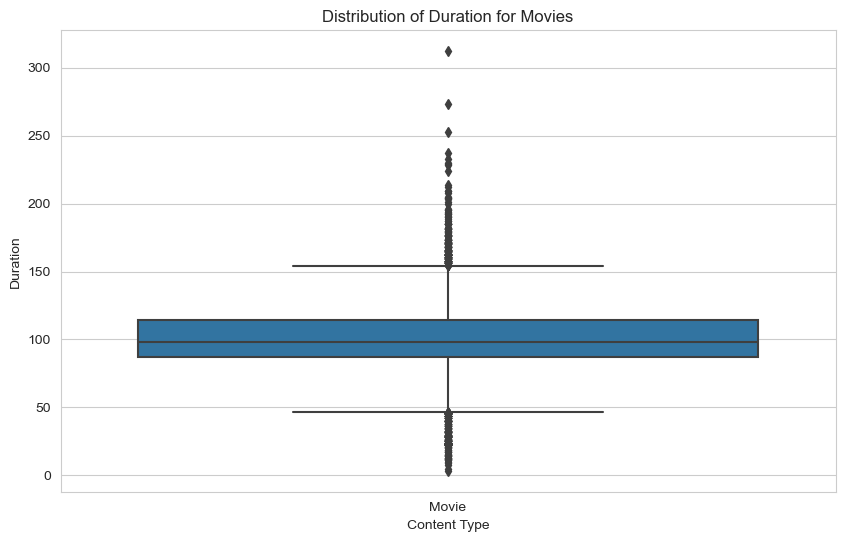

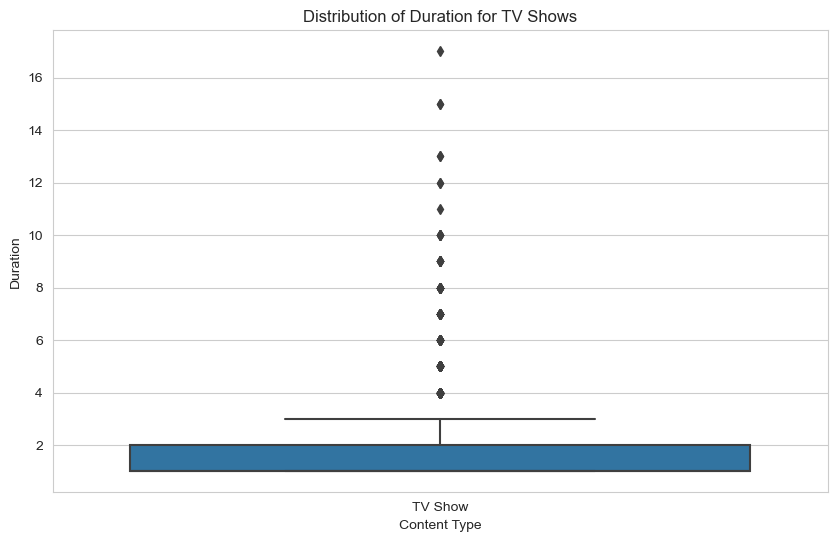

In [117]:
warnings.filterwarnings("ignore")
# Convert 'duration' column to string type
df_movies['duration'] = df_movies['duration'].astype(str)
# Extracting and converting the duration for movies
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)
# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

df_tv_shows['duration'] = df_tv_shows['duration'].astype(str)
# Extracting and converting the duration for TV shows
df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for TV show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tv_shows, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()


### Insights: 
##### we can see that most movies fall within a reasonable duration range, with few outliers exceeding approximately 2.5 hours. This suggests that most movies on Netflix are designed to fit within a standard viewing time.

##### or TV shows, the box plot reveals that most shows have one to four seasons, with very few outliers having longer durations. This aligns with the earlier trends, indicating that Netflix focuses on shorter series formats.

### 4.3 Analyzing the best time for launching a TV show.

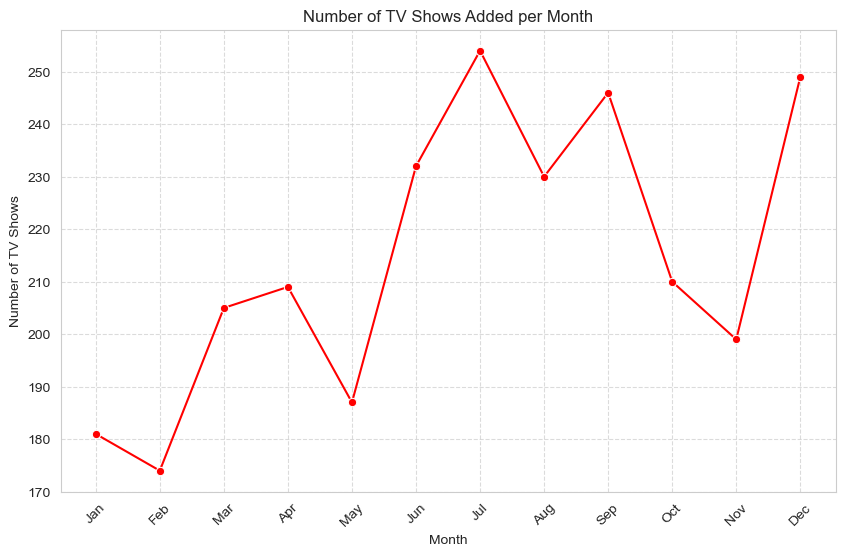

In [118]:
# We've opted not to utilize the cast and director variables in this analysis. Therefore, we've made a copy of the original dataframe for our analysis.
# Filter the dataset to include only TV shows
tv_shows_data = data_copy[data_copy['type'] == 'TV Show'].copy()
# Convert 'Date_added' column to datetime format
tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'], format='%B %d, %Y',errors='coerce')
#tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'],format='%B %d, %Y')
tv_shows_data['year_added'] = tv_shows_data['date_added'].dt.year
tv_shows_data['month_added'] = tv_shows_data['date_added'].dt.month
# Create a DataFrame with the count of TV shows added per month
df_month = pd.DataFrame(tv_shows_data['month_added'].value_counts()).reset_index().rename(columns={'month_added': 'month', 0: 'count'})
# Convert month number to month name
df_month['month'] = df_month['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert 'month' to categorical data with the specified order
df_month['month'] = pd.Categorical(df_month['month'], categories=month_order, ordered=True)
# Set the style for seaborn
sns.set_style("whitegrid")
# Plot the distribution of TV shows added per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_month, x='month', y='count', marker='o', color='red')
plt.title('Number of TV Shows Added per Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Insights: 
#### The majority of TV shows were added during the months of July, December, and September.

### 4.3.1 Analyzing the correlation between genres : HeatMap
##### Analyzing the correlation between genres can reveal interesting relationships between different types of content.

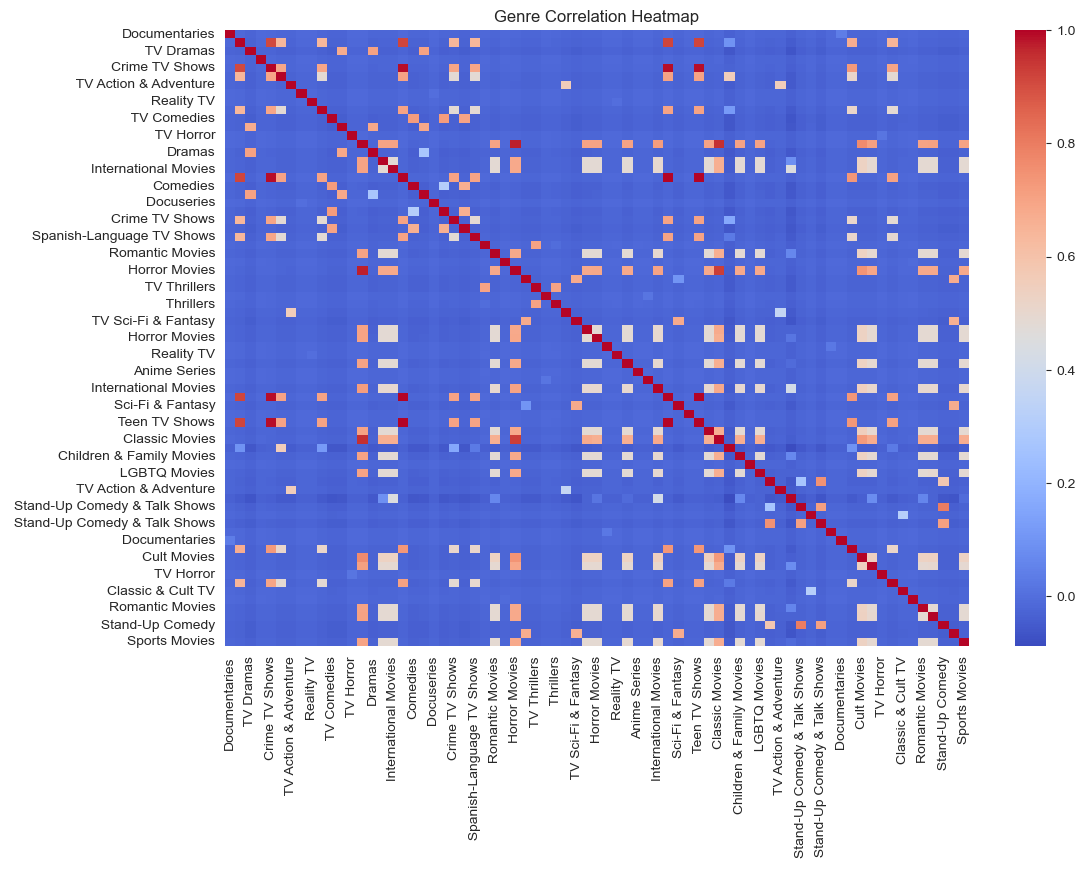

In [127]:
# Extracting unique genres from the 'listed_in' column
genres = listed_in_df['listed_in'].unique()
genes = genres[:10]
# Create a new DataFrame to store the genre data
genre_data = pd.DataFrame(index=genes, columns=genes, dtype=float)  # Using genes as index and columns
# Fill the genre data DataFrame with zeros
genre_data.fillna(0, inplace=True)  # Corrected from listed_in_df.fillna to genre_data.fillna
for genre in genres:
    # Fill the diagonal with 1 (each genre is perfectly correlated with itself)
    genre_data.loc[genre, genre] = 1
    
    # Iterate again to compare this genre with other genres
    for other_genre in genres:
        # Skip if it's the same genre
        if genre == other_genre:
            continue
        
        # For example, you might compare how many times genre appears with other_genre in your dataset
        count = listed_in_df[listed_in_df['listed_in'].str.contains(genre) & listed_in_df['listed_in'].str.contains(other_genre)].shape[0]
        
        # Fill the values in the DataFrame
        genre_data.loc[genre, other_genre] = count
        genre_data.loc[other_genre, genre] = count  # Since it's symmetric
# Create a correlation matrix using the genre data
correlation_matrix = genre_data.corr()
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()


### Insights :
#####  By analyzing the heatmap, we can identify strong positive correlations between specific genres, such as TV Dramas, TV Action and Adventure, International Movies etc..

In [ ]:
4.3.2 Identify the top 10 actors who have made the most appearances in both movies and TV shows.

### 4.4 Analysis of actors/directors of different types of shows/movies.
#### 4.4.1 Identify the top 10 actors who have made the most appearances in both movies and TV shows.

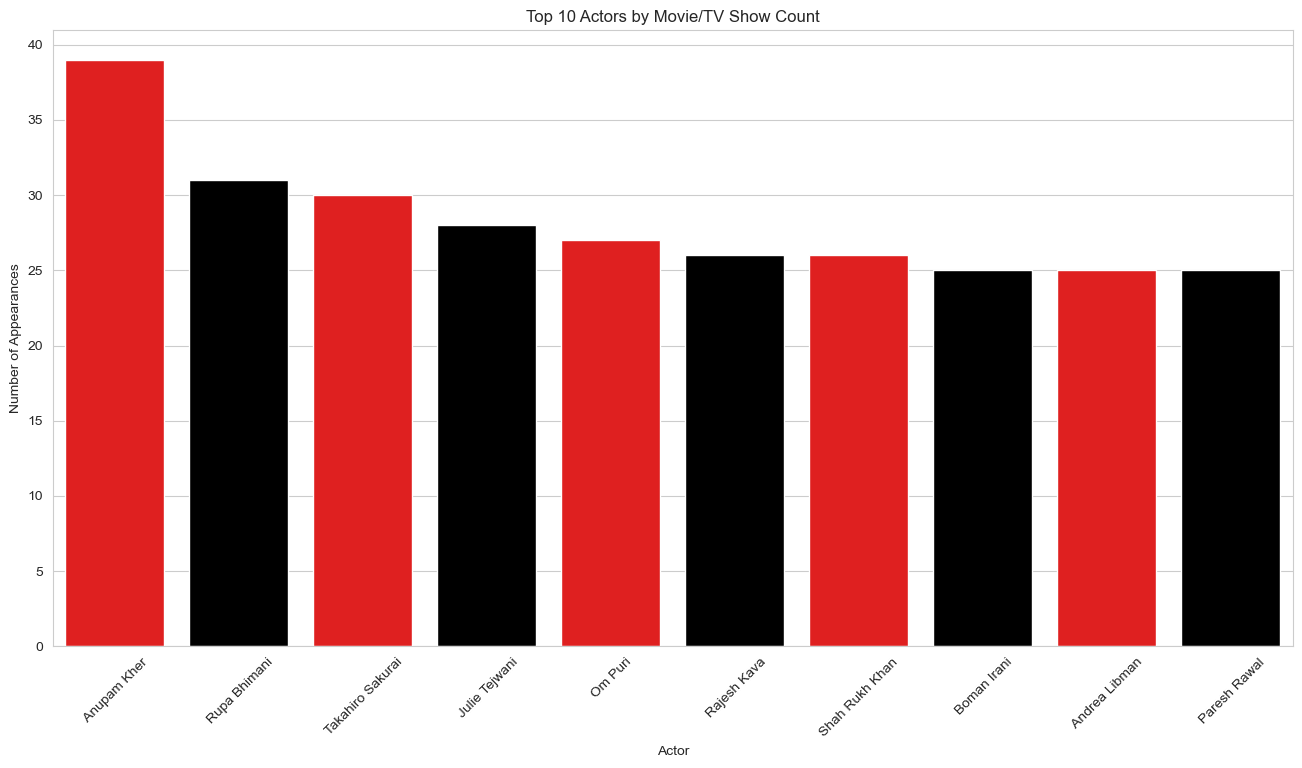

In [72]:
# Count the occurrences of each actor
actor_counts = cast_df['Actor'].value_counts()
# Select the top 10 actors
top_10_cast = actor_counts.head(10)
# Filter the data for the top 10 actors
data_top_10 = data[data['Actor'].isin(top_10_cast.index)]
plt.figure(figsize=(16, 8))
sns.barplot(x=top_10_cast.index, y=top_10_cast.values, palette=colors)
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.title('Top 10 Actors by Movie/TV Show Count')
plt.show()

### Insights: 
#### The bar chart indicates that Anupam Kher holds the highest number of appearances in both movies and TV shows..

#### 4.4.2 Identify the top 10 directors who have directed the highest number of movies or TV shows.

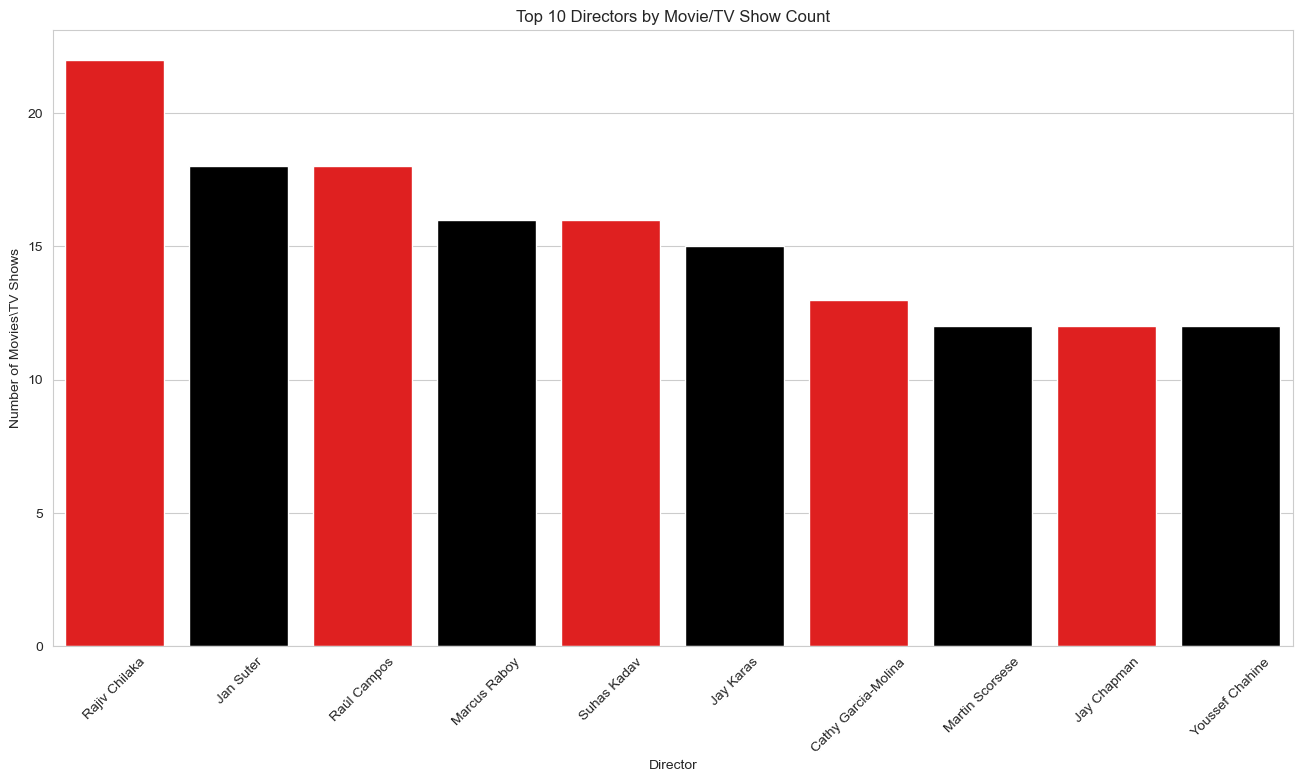

In [61]:
# Count the occurrences of each director
director_counts = directors_df['Director'].value_counts()
# Select the top 10 directors
top_10_directors = director_counts.head(10)
# Filter the data for the top 10 directors
top_10_data = data[data['Director'].isin(top_10_directors.index)]
plt.figure(figsize=(16, 8))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette=colors)
plt.xlabel('Director')
plt.ylabel('Number of Movies\TV Shows')
plt.xticks(rotation=45)
plt.title('Top 10 Directors by Movie/TV Show Count')
plt.show()

### Insights: 
#### According to the bar chart, Rajiv Chilaka emerges as the director with the highest number of movies or TV shows within the Netflix library's top 10.

### 4.5. Analyzing the Preference of TV Shows/Movies in Recent Years

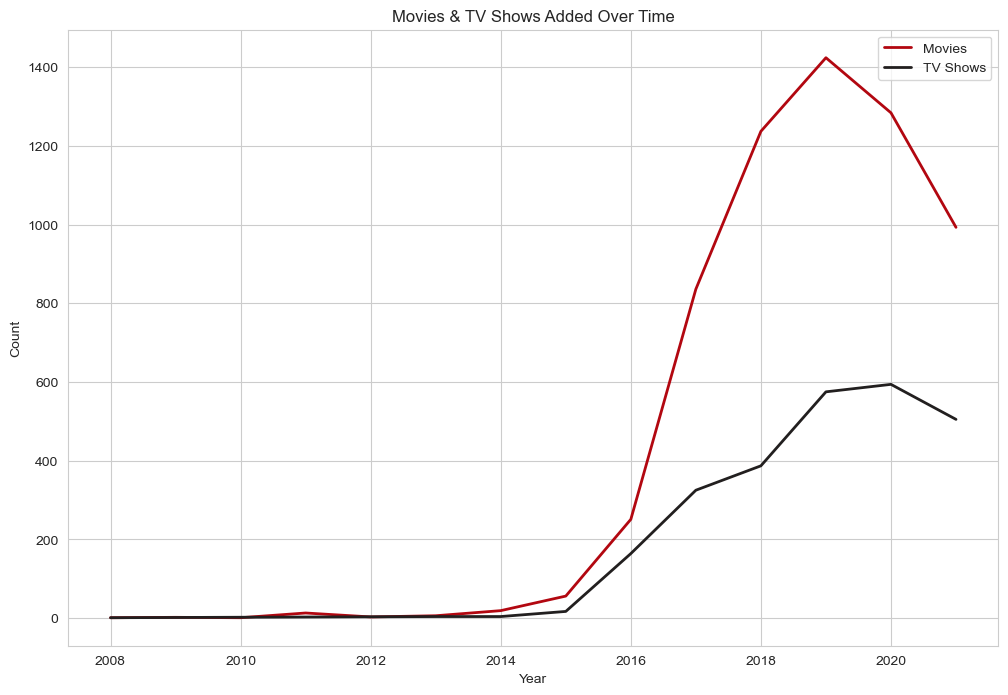

In [62]:
# Filter the DataFrame to include only Movies and TV Shows
df_movies = data_copy[data_copy['type'] == 'Movie']
df_tv_shows = data_copy[data_copy['type'] == 'TV Show']
# Group the data by year and count the number of Movies and TV Shows 
# added in each year
movies_count = df_movies['year_added'].value_counts().sort_index()
tv_shows_count = df_tv_shows['year_added'].value_counts().sort_index()
# Create a line chart to visualize the trends over time
plt.figure(figsize=(12,8))
plt.plot(movies_count.index, movies_count.values, color='#b20710', label='Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values, color='#221f1f', label='TV Shows', linewidth=2)
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
# Show the plot
plt.show()


##### The line chart shows how many movies and TV shows were added to Netflix over time. It helps us see how the amount of content has changed over the years, with different lines for movies and TV shows.
### Insights:
##### Netflix experienced significant growth beginning in 2015, and we can observe that it added more movies than TV shows over the years.

### 4.6. Exploring the Variety of Content Offered Across Various Countries

<Figure size 1200x800 with 0 Axes>

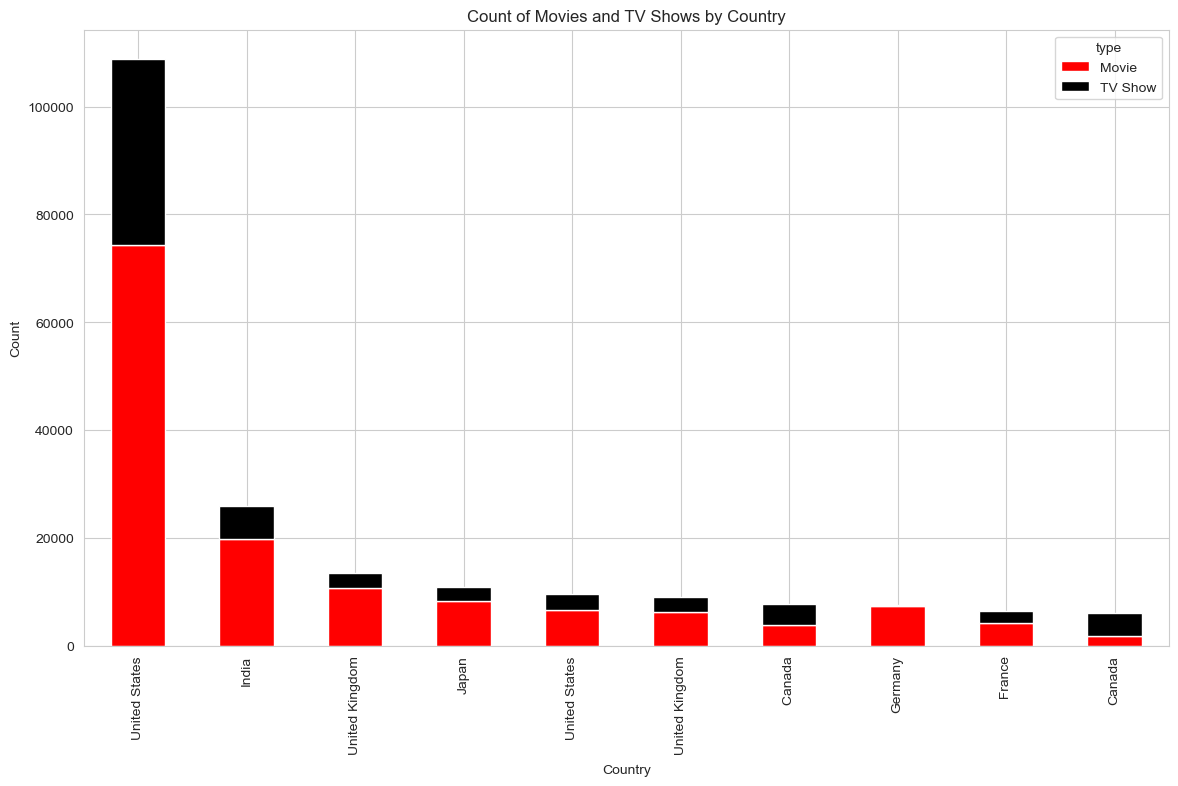

In [63]:
# Group the data by country and type, then count the number of entries in each group
country_type_counts = data.groupby(['Country', 'type']).size().unstack(fill_value=0)

# Sum the counts across movie and TV show types to get the total count for each country
country_type_counts['Total'] = country_type_counts.sum(axis=1)

# Sort the data by the total count in descending order
country_type_counts = country_type_counts.sort_values(by='Total', ascending=False).head(10)

# Remove the 'Total' column for plotting
country_type_counts.drop(columns='Total', inplace=True)
# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
country_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['red', 'black'])
plt.title('Count of Movies and TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




### Insights: 
##### The stacked bar chart highlights that the United States stands out as the leading country in Netflix's popularity,when examining the diverse range of content available across different countries 

### 5. Missing Value & Outlier check (Treatment optional)

In [ ]:
df
df_tv_shows
# Analyze the distribution of content type (Movie/TV Show)
content_type_distribution = df['Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
content_type_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Content Type (Movie/TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [64]:
# Analyze the distribution of content type (Movie/TV Show)
data['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [53]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
